# Задание 1.1

$$X_1, X_2, ... X_n \sim U[-\theta, \theta]$$

### Воспользуемся методом моментов для оценки $\theta^2$.

У нас одна неизвестная, возьмём $g(x) = x^2$

$$E X^2 = \frac{\theta^2}{3}$$

$$\overline{X^2} = \frac{\hat{\theta}^2}{3}$$

$$\hat{\theta}^2 = 3 \overline{X^2}$$

### Посчитаем смещение

$$bias \space \hat{\theta}^2 = E \hat{\theta}^2 - E \theta^2$$

$$E \hat{\theta}^2 = E \space 3 \overline{X^2} = 3 E X^2 = \theta^2 $$

$$bias \space \hat{\theta}^2 = 0$$
Следовательно оценка несмещённая

### Посчитаем дисперсию

$$S_*^2 = Var \space \hat{\theta}^2 = E \hat{\theta}^4 - (E \hat{\theta}^2)^2$$

$$E \hat{\theta}^4 = 9 E (\overline(X^2))^2 = 9 E (\frac{1}{n} \sum_{i=1}^n X_i^2)^2
= 9 (\frac{E X^4}{n} + \frac{n - 1}{n} (E X^2)^2) = 9 (\frac{\theta^4}{5n} + \frac{(n - 1)\theta^4}{9n}) $$

$$S_*^2 = 9 (\frac{\theta^4}{5n} + \frac{(n - 1)\theta^4}{9n}) - \theta^4$$

### Посчитаем среднеквадратическую ошибку

Т.к. оценка несмещённая

$$MSE \space \theta^2 = Var \space \theta^2 $$


Из метода моментов и состоятельности и асимтотической нормальности второго момента следует, что оценка состоятельна и асимптотически нормальна.



In [5]:
from scipy import stats
import matplotlib.pyplot as plt
import math

In [6]:
SAMPLE_SIZES = [1, 10, 100, 1000, 10000, 100000]
M = 20

In [7]:
theta = 10
rnd = stats.uniform(-theta, theta * 2)

In [8]:
sample = [[[rnd.rvs() for _ in range(sz)] for _ in range(M)] for sz in SAMPLE_SIZES]


In [9]:
def estimate_theta(sample):
    return math.sqrt(3 * sum(map(lambda x: x ** 2, sample)) / len(sample))

In [10]:
estimated = [[estimate_theta(sample[i][j]) - theta for j in range(M)] for i in range(len(SAMPLE_SIZES))]

In [11]:
print("N\t\t\ttheta_hat")
for i in range(len(SAMPLE_SIZES)):
    print(f"{SAMPLE_SIZES[i]}\t\t\t{estimate_theta(sample[i][0])}")

N			theta_hat
1			13.601577530828118
10			10.635371557977654
100			10.188434915301633
1000			9.948614121778213
10000			9.986108368447075
100000			10.004010287169367


Случайная величина - $(\hat{\theta} - \theta)$ рассчитанная для фиксированного `N`. Соотвественно объем выборки `M`.

Посчитаем выборочные характеристики: среднее, дисперсия, медиана, минимум, максимум, количество оценок, которые отличаются от теортического параметра не более чем на заданный порог

Порогом для совпадение поставим отличие не более чем на 0.005


In [12]:
def sample_mean(sample):
    return sum(sample) / len(sample)

def sample_variance(sample):
    m = sample_mean(sample)
    return sum(map(lambda x: (x - m) ** 2, sample)) / len(sample)

def sample_median(sample):
    s = sample.copy()
    s.sort()
    return s[int(len(s) / 2)]

def mse(sample):
    return math.sqrt(sample_variance(sample))

lim = 0.005

def sample_cnt_good(sample):
    return len(tuple(filter(lambda x: abs(x) < lim , sample)))

In [13]:
def process_stats(sample, N):
    print(f"=================== N={N} ===================")
    plt.plot(sample)
    mn = min(min(sample) - 1, -1)
    mx = max(max(sample) + 1, 1)
    plt.ylim(mn, mx)
    plt.show()

    def print_stat(name, stat):
        print(f"{name}\t\t{stat(sample)}")

    print_stat("Mean", sample_mean)
    print_stat("Variance", sample_variance)
    print_stat("Median", sample_median)
    print_stat("Max", max)
    print_stat("Min", min)
    print_stat("Good", sample_cnt_good)



=================== N=1 ===================


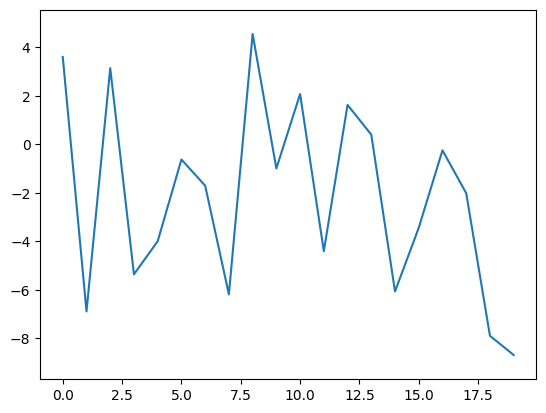

Mean		-2.15460859530772
Variance		15.10659079274347
Median		-1.7037628136490568
Max		4.550199260154834
Min		-8.683219164281319
Good		0
=================== N=10 ===================


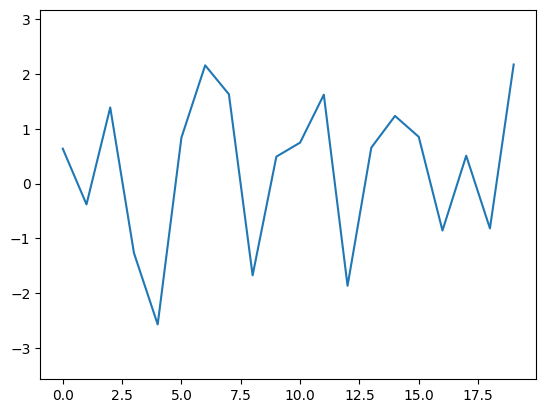

Mean		0.2739584414606381
Variance		1.7959213693232745
Median		0.6535895227163238
Max		2.1701414772355214
Min		-2.569774284335744
Good		0
=================== N=100 ===================


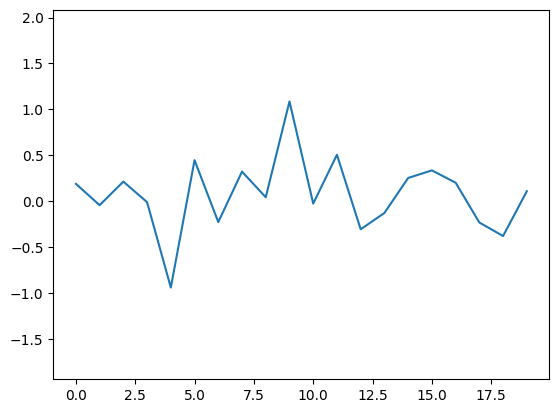

Mean		0.06987411189261969
Variance		0.1601054200960586
Median		0.10782707682704462
Max		1.0864053221053886
Min		-0.941505888592653
Good		0
=================== N=1000 ===================


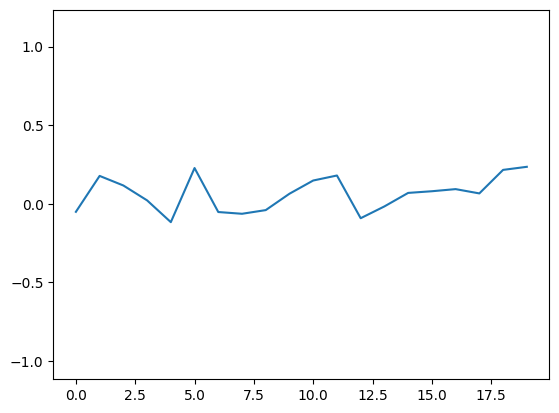

Mean		0.0628399348865262
Variance		0.011779685260743066
Median		0.0689482776157373
Max		0.23505449050446003
Min		-0.11708969865416208
Good		0
=================== N=10000 ===================


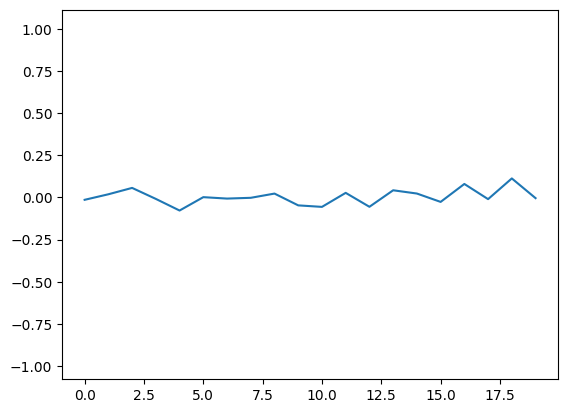

Mean		0.004015680813491951
Variance		0.00207448969320671
Median		-0.001997094014518197
Max		0.11285060506142663
Min		-0.07738259410283632
Good		3
=================== N=100000 ===================


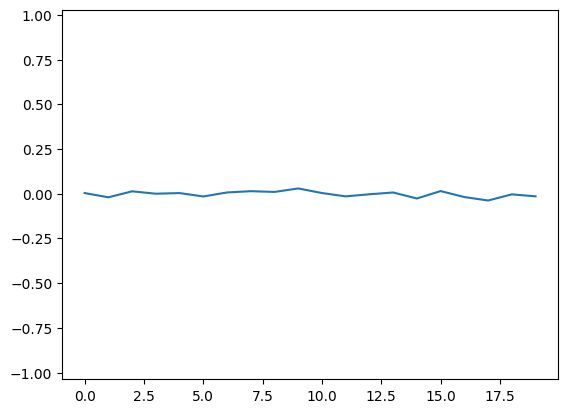

Mean		-0.0021085915526463774
Variance		0.0002590928047920515
Median		0.0038829763977457077
Max		0.029738873248035702
Min		-0.03763177574586152
Good		6


In [14]:
for i in range(len(SAMPLE_SIZES)):
    process_stats(estimated[i], SAMPLE_SIZES[i])